In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('custom_dataset.csv').drop('Unnamed: 0', axis=1).select_dtypes(['number'])
print(df.columns)
print('\n# number of columns in DataFrame =', len(df.columns))

Index(['Width', 'Height', 'Brightness', 'stars', 'price', 'rating', 'reviews',
       'staff', 'facilities', 'cleanliness', 'comfort', 'valueForMoney',
       'location', 'albuquerque', 'austin', 'baltimore', 'bonston', 'calgary',
       'charlotte', 'chicago', 'columbus', 'dallas', 'denver', 'detroit',
       'el_paso', 'fort_worth', 'fresno', 'houston', 'indianapolis',
       'jacksonville', 'kansas', 'las_vegas', 'los_angeles', 'louiseville',
       'memphis', 'mesa', 'milwaukee', 'montreal', 'nashville', 'new_york',
       'oklahoma_city', 'orlando', 'philadelphia', 'phoenix', 'portland',
       'sacramento', 'san_antonio', 'san_diego', 'san_francisco', 'san_jose',
       'seattle', 'toronto', 'tucson', 'washington_dc', 'c1', 'c2', 'c3', 'd1',
       'd2', 'd3', 'travelweekly_year_built', 'travelweekly_num_floors',
       'travelweekly_num_rooms', 'travelweekly_events_num_rooms',
       'travelweekly_events_total_sqft', 'travelweekly_min_rate',
       'travelweekly_max_rate', 'num_

In [11]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

for column in ['travelweekly_year_built', 'travelweekly_num_floors', 'travelweekly_num_rooms', 'travelweekly_min_rate', 'travelweekly_max_rate', 'num_room_types', 'standard_room_sqft']:
    df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])

df = df.dropna()
X, y = df.drop('price', axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=False)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


MSE of the base model: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


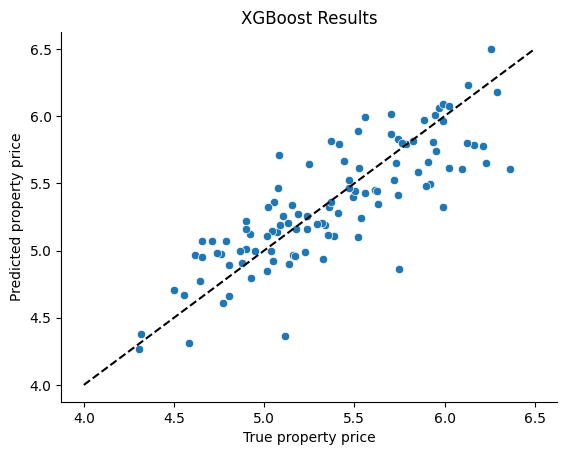

In [18]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

predicted = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, predicted, squared=False)
print(f"MSE of the base model: {rmse:.3f}")

sns.scatterplot(x=y_test, y=predicted)
x_range = np.linspace(4, 6.5, 10)
sns.lineplot(x=x_range, y=x_range, color='k', ls="--")
plt.xlabel("True property price")
plt.ylabel("Predicted property price")
plt.title("XGBoost Results")
sns.despine()
plt.show()